# Project By Datacamp
### Solution Proposal by: André Fernandes
### Found me on:
#### -> https://github.com/vBarFace 
#### -> https://www.linkedin.com/in/andr%C3%A9-fernandes-868006207/

# ------------------------------------

## Exercise introduction by Datacamp: 

###### Fashion Forward is a new AI-based e-commerce clothing retailer. They want to use image classification to automatically categorize new product listings, making it easier for customers to find what they're looking for. It will also assist in inventory management by quickly sorting items.

###### As a data scientist tasked with implementing a garment classifier, your primary objective is to develop a machine learning model capable of accurately categorizing images of clothing items into distinct garment types such as shirts, trousers, shoes, etc.

# ------------------------------------

## Project Instructions:
###### Define a CNN classifier as a Sequential model with the following layers:
###### - Convolution layer with 32 filters, kernel size 3 and stride 1, followed by a rectilinear unit (relu) activation.
###### - Convolution layer with 16 filters, kernel size 3 and stride 1, followed by a rectilinear unit (relu) activation.
###### - Flatten layer.
###### - Dense layer with the appropriate number of units and activation function.

###### Train your CNN on the given train_images using a suitable optimizer.
###### - Only run your training loop for a single epoch to keep the run time down.
###### - Use accuracy as a metric, and an appropriate loss function.

###### Evaluate your CNN on the given test_images:
###### - Calculate the accuracy of your trained classifier on the test_images, storing your answer in the variable test_accuracy.

###### The above instructions are what you will need to use to submit the project, but once you've passed the project, feel free to experiment with the model architecture and training arguments to achieve a better accuracy!

# ---------------------------------------

### Given code by Datacamp:

In [5]:
# Run the cells below first
#!pip install tensorflow

In [6]:
from tensorflow.keras import datasets, layers, models, Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

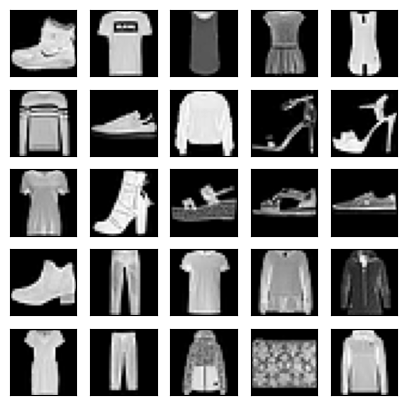

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255.0, cmap='gray')
plt.show()

In [9]:
# Start coding here
# Use as many cells as you need

# ------------------------------------

## Lets visualize data first:

In [12]:
import numpy as np

# Lets see the size of the training and testing data set
print(f"Size of Training Dataset: {len(train_images)} - The shape: {train_images.shape}")
print(f"Size of Test Dataset: {len(test_images)} - The shape: {test_images.shape}")

# Lets print some values of the training set
print(f"\nSome training labels: {train_labels}.")
# Lets get the number of unique lables
unique_labels, training_labels_counts = np.unique(train_labels, return_counts=True)
_, testing_labels_counts = np.unique(test_labels, return_counts=True)
n_labels = max(unique_labels) + 1 # Get the number of unique labels
print(f"Unique Labels: {unique_labels}\nNumber of unique labels: {n_labels}")

Size of Training Dataset: 60000 - The shape: (60000, 28, 28)
Size of Test Dataset: 10000 - The shape: (10000, 28, 28)

Some training labels: [9 0 0 ... 3 0 5].
Unique Labels: [0 1 2 3 4 5 6 7 8 9]
Number of unique labels: 10


In [13]:
print("\nLets see the matrix of the first training image: \n", train_images[0])
# Lets normalize the values of the training images
train_images = train_images / 255
print("\nLets see the matrix of the first training image normalized: \n", train_images[0])

# Lets normalize the values of the testing images
test_images = test_images / 255
standardized_test_images = []
# Lets Standardizing the images
for img in test_images:
    mean = np.mean(img)
    std = np.std(img)

    standardized_image = (img - mean) / std
    standardized_test_images.append(standardized_image)

print("\nLets see the matrix of the first testing image: \n", test_images[0])
print("\nLets see the matrix of the first testing image standardized: \n", standardized_test_images[0])


Lets see the matrix of the first training image: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   

In [14]:
# Define a function to print some images of dataset
def show_images(images, labels, num_images):
    # Inicialize the figure
    plt.figure(figsize=(10, 10))
    # Run through the num_images you want to see
    for i in range(num_images):      
        # Create a subplot for each image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray') # Use the color map as gray
        plt.title(f'Label: {labels[i]}') # Make the label on top of the image
        plt.axis('off')

    plt.tight_layout()
    plt.show()

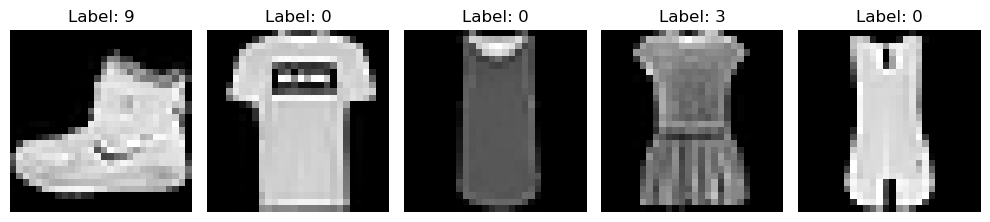

In [15]:
# Display images from the training dataset
n_images = 5
show_images(train_images, train_labels, n_images)

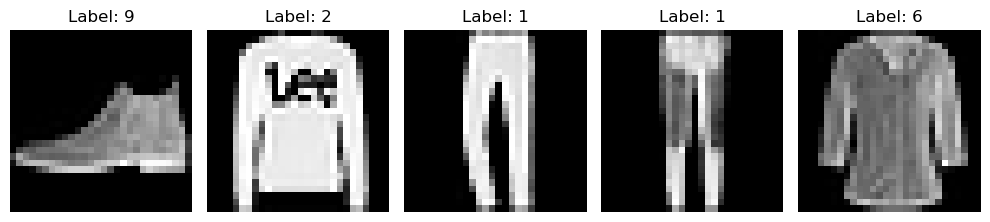

In [16]:
# Display images from the standardized test
show_images(standardized_test_images, test_labels, n_images)

Unique lables: [0 1 2 3 4 5 6 7 8 9]
Frequence of training labels: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
Frequence of testing labels: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


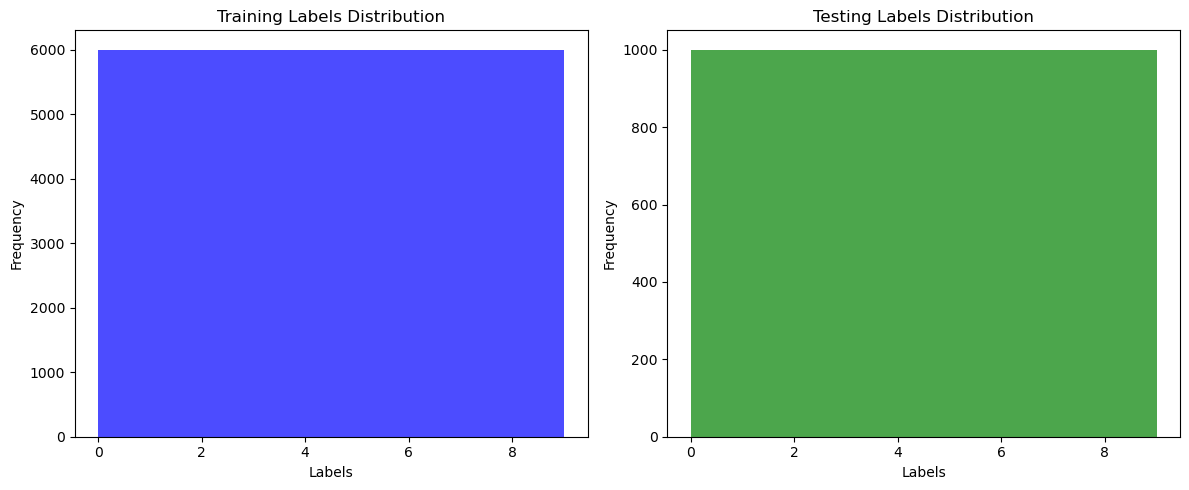

In [17]:
# Print the information of labels
print(f"Unique lables: {unique_labels}")
print(f"Frequence of training labels: {training_labels_counts}")
print(f"Frequence of testing labels: {testing_labels_counts}")

# Lets see the labels distribution of each set
plt.figure(figsize=(12, 5))

# First subplot for the first histogram
plt.subplot(1, 2, 1)
plt.hist(train_labels, bins=n_labels, color='blue', alpha=0.7)
plt.title('Training Labels Distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')

# Second subplot for the second histogram
plt.subplot(1, 2, 2) 
plt.hist(test_labels, bins=n_labels, color='green', alpha=0.7)
plt.title('Testing Labels Distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
# Lets now convert the labels to one-hot-encode
train_labels_1hot = to_categorical(train_labels)
test_labels_1hot = to_categorical(test_labels)

print(f"Lets see labels now 1 hot encoded: \n{train_labels_1hot}")

Lets see labels now 1 hot encoded: 
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Lets define the model

In [20]:
# Lets get the image size
img_height = train_images.shape[1]
img_width = train_images.shape[2]
img_channels = 1

# Define the model
model = Sequential()
# Lets add first convolution layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', strides=(1, 1), input_shape=(img_height, img_width, img_channels)))
# Lets add secound convolution layer
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', strides=(1, 1)))
# Lets flatten the layer
model.add(Flatten())
# Lets add the output layer
model.add(Dense(n_labels, activation="softmax"))

model.summary()

C:\Users\andre\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        92,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,114 (379.35 KB)

 Trainable params: 97,114 (379.35 KB)

 Non-trainable params: 0 (0.00 B)

# Lets Train

In [22]:
# Lets compile
model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

n_epoches = 100
batch_size = 100
# Lets fit the model
history =  model.fit(
    train_images,
    train_labels_1hot,
    validation_split = 0.2,
    epochs = n_epoches,
    batch_size= batch_size
)

Epoch 1/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7505 - loss: 0.6955 - val_accuracy: 0.8667 - val_loss: 0.3673
Epoch 2/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8780 - loss: 0.3425 - val_accuracy: 0.8852 - val_loss: 0.3222
Epoch 3/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8920 - loss: 0.3001 - val_accuracy: 0.8907 - val_loss: 0.3041
Epoch 4/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9056 - loss: 0.2673 - val_accuracy: 0.8957 - val_loss: 0.2900
Epoch 5/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9123 - loss: 0.2430 - val_accuracy: 0.8999 - val_loss: 0.2836
Epoch 6/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9195 - loss: 0.2279 - val_accuracy: 0.8994 - val_loss: 0.2837
Epoch 7/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9297 - loss: 0.2017 - val_accuracy: 0.9034 - val_loss: 0.2751
Epoch 8/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9359 - loss: 0.1768 - 

# Lets get and visualize results

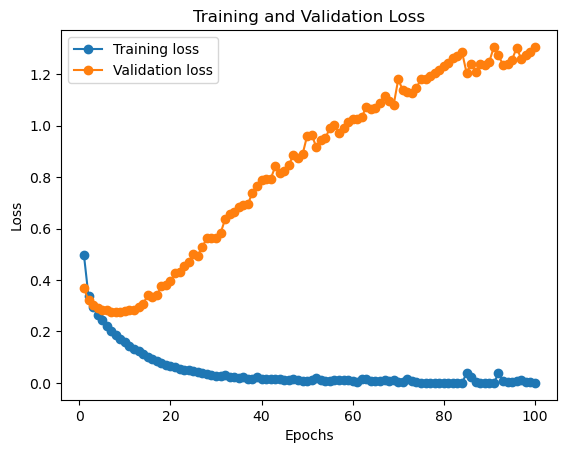

In [24]:
# Lets plot the trainign and validation loss
plt.plot(range(1, n_epoches + 1), history.history['loss'], '-o', label='Training loss')
plt.plot(range(1, n_epoches + 1), history.history['val_loss'], '-o', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

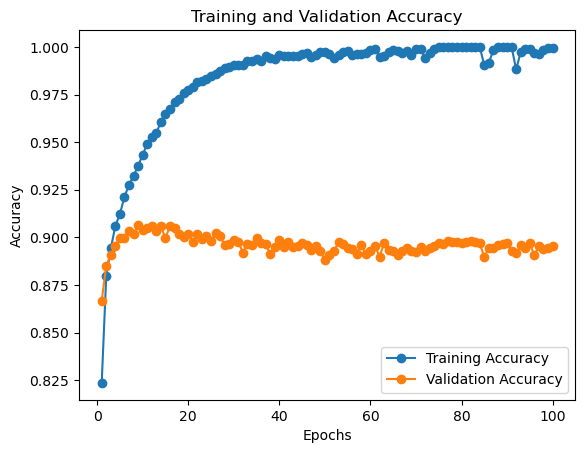

In [25]:
# Lets plot the training and validation accuracy
plt.plot(range(1, n_epoches + 1), history.history['accuracy'], '-o', label='Training Accuracy')
plt.plot(range(1, n_epoches + 1), history.history['val_accuracy'], '-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Now lets Evaluate the model

In [27]:
# Lets evalutae the model with the test set
score = model.evaluate(
    test_images,
    test_labels_1hot,
    batch_size=batch_size,
)

print(f"The model got and Accuracy of {score[1]}.\nThe loss was {score[0]}.")

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8874 - loss: 1.3741
The model got and Accuracy of 0.8906000256538391.
The loss was 1.2915509939193726.
